# Spectral study of sinusoidal signals

We have the measurements of a signal $u(t)$, which we know consists of the following components: 
- A DC component.
- A fundamental at 50 Hz.
- Harmonics of rank 3, 5, 7 and 11.

We don't know the amplitude of the various components.

This signal was sampled using 3 differents sampling frequencies.

Thoses sampled signals are contained in the file `data_DSP_exercise_1_v2.npz`

In [115]:
import numpy as np

content = np.load("./data_DSP_exercise_1_v2.npz")
list(content.keys())

['t_Fs_1', 't_Fs_2', 't_Fs_3', 'u_Fs_1', 'u_Fs_2', 'u_Fs_3']

Here are the time and frequency representations of the signal `u_Fs_1`:

![](./u_fs_1.svg)

![](./u_fs_1_freq.svg)

1. We will first work with the signal `u_Fs_2`. You are asked to: 
    - Determine the sampling frequency of the measured signal u based on the values of the time vector
    - Plot the signal us as a function of time
    - Calculate the spectral resolution of the spectrum if we apply the FFT on us (solution : 20 Hz)
    - Apply the FFT on this sampled signal and represent the frequency spectrum
        
        Expected result:

        ![](./expected_result_1.svg)

    - Interpret / explain the phenomena encountered

2. You are then asked to window this signal on one period of the fundamental (vectors `u_Fs_2` and `t_Fs_2`) and then again : 
    - To represent the temporal signal
    - To calculate the frequency resolution
    - To apply the "raw" FFT (without making the necessary corrections) on this sampled signal and to represent the modulus of the frequency spectrum
        Expected result:

        ![](./expected_result_2.svg)

    - Interpret / explain the phenomena encountered
    - Apply the usual corrections on the FFT and represent the new frequency spectrum obtained
        
        Expected result:

        ![](./expected_result_3.svg)

    - Interpret / explain the phenomena encountered

3. Then, we we'll work with the signal `u_Fs_3`. You are asked:
    - Determine the sampling frequency of the measured signal u based on the values of the time vector
    - To window this signal over one period of the fundamental, then again:
    - To calculate the frequency resolution
    - To apply the FFT on this sampled signal by applying the usual corrections to arrive at representing the frequency spectrum of the signal
    
    Expected result:

    ![](./u_fs_1_freq.svg)

4. Finally, you are asked to process the temporal data (sampled at 2 kHz) and then apply the FFT in order to present a spectrum with a frequency resolution of 25 Hz.
    
    Expected result:

    ![](./expected_result_4.svg)

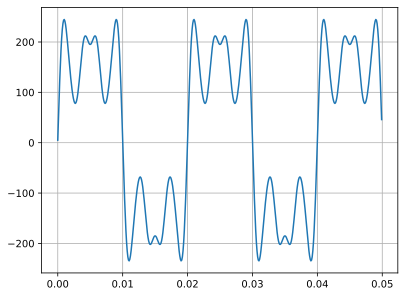

In [116]:
from matplotlib import pyplot as plt

%config InlineBackend.figure_formats = ['svg']

t_Fs_1 = content['t_Fs_1']
u_Fs_1 = content['u_Fs_1']

plt.figure()
plt.plot(t_Fs_1, u_Fs_1)
plt.grid()
plt.show()

## 1. Sampling at 1000 Hz without windowing

In [117]:
t_Fs_2 = content['t_Fs_2']
u_Fs_2 = content['u_Fs_2']

np.diff(t_Fs_2)

array([0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001])

In [118]:
from scipy.stats import mode

Ts = mode(np.diff(t_Fs_2)).mode
print(Ts)

Fs = 1 / Ts
Fs

0.0010000000000000009


np.float64(999.9999999999991)

In [119]:
N  = len(u_Fs_2)
df = Fs / N
df

np.float64(19.999999999999982)

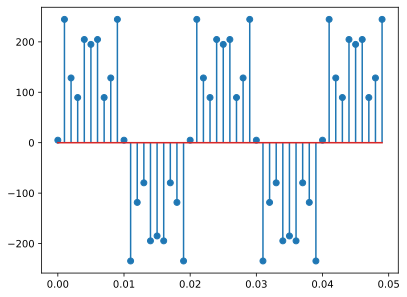

In [120]:
plt.stem(t_Fs_2,u_Fs_2)
plt.show()

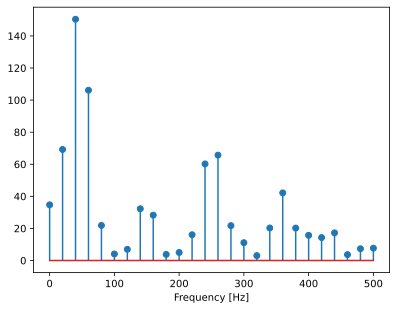

In [121]:
X = np.fft.fft(u_Fs_2)
Us = np.abs(X)
Us = Us / N                 # The result is divided by the number of samples N
Us[1:] = Us[1:]*2           # We multiply the amplitude by 2, expect for the DC component
Us = Us[:N//2+1]            # We only keep the upper part of the spectrum 
n = np.arange(N//2+1)       # Indexes of the frequency axis
f = df * n                  # Frequencies of the x-axis

plt.stem(f,Us)
plt.xlabel('Frequency [Hz]')
plt.show()

We expected to have only 6 lines: the DC component, the fundamental and the harmonics of rank 3, 5, 7 and 11. The amplitudes do not coincide either.

We are dealing with 2 combined phenomena:

- That of spectral leakage : the fundamental being 50 Hz, and our resolution being 20 Hz, our lines are spread over several lines
- Because of the bad windowing, components not present in the original signal are calculated, because the FFT recopies to infinity the temporal signal that we give it

## 2a. Raw FFT result for a correctly windowed signal, still at 1000 Hz

We apply a windowing on a period of the fundamental (that could be more, as long as it is a number of whole periods) to solve this problem there:

In [122]:
fu = 50
Tu = 1 / fu
N = Tu / Ts     # Computing the number of samples required to get one entire period of the fundamental sine wave
N = round(N)
N

20

In [123]:
df = Fs / N     # Let's check the frequency resolution we get
df

np.float64(49.99999999999996)

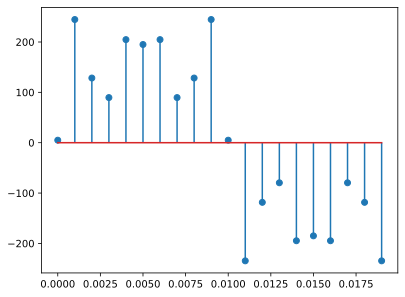

In [124]:
us2 = u_Fs_2[:N]
ts2 = t_Fs_2[:N]

plt.stem(ts2,us2)
plt.show()

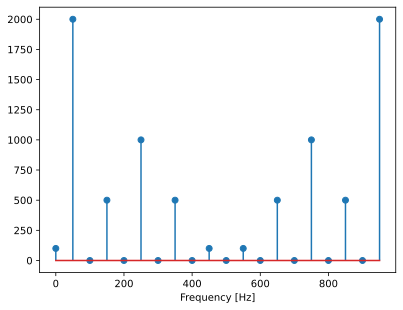

In [125]:
Us2 = np.abs(np.fft.fft(us2))
n = np.arange(N)
f = df * n

plt.stem(f, Us2)
plt.xlabel('Frequency [Hz]')
plt.show()

We can see here that the number of lines has decreased, and that there are lines at 0, 50, 150, 250, 350 and 550 Hz as expected.

On the other hand the amplitudes are not correct, and there are additional lines at a supposedly higher frequency, with a mirror effect at 500 Hz, as well as a line at 450 Hz, not present in the time signal.

## 2b. Corrected FFT result for a correctly windowed signal, still at 1000 Hz

**Illustration of the sampling theorem (Shannon) and the phenomenon of spectral folding :**

Let us correct this by applying the necessary modifications: We keep only half of the spectrum returned by the fft instruction, and we double the amplitudes, except for the DC component.

Remember that we want to observe a frequency up to 550 Hz and that we have sampled at 1000 Hz.

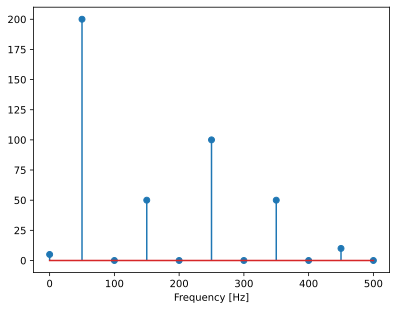

In [126]:
Us2 = Us2 / N                  # The result is divided by the number of samples N
Us2[1:] = Us2[1:] * 2          # We multiply the amplitude by 2, expect for the DC component
Us2 = Us2[:N//2+1]             # We only keep the upper part of the spectrum 
n = np.arange(N//2+1)          # Indexes of the frequency axis
f = df * n                     # Frequencies of the x-axis
                    
plt.stem(f,Us2)
plt.xlabel('Frequency [Hz]')
plt.show()

We can observe here that we do not see all the harmonics: the one at 550 Hz is missing.

In addition, there is a line at 450 Hz, not existing in the time signal. This is due to the phenomenon of **spectral folding**: the lines beyond Fs/2 fold at lower frequency. $(F-F_s)$

For this reason, we see the 550 Hz line appearing here at 450 Hz: 550-1000 = -450 Hz, which corresponds to a frequency of 450 Hz, with an opposite phase (cfr Euler).

This illustrates the sampling theorem: by sampling at 1000 Hz, we do not see the frequencies beyond 500 Hz in their expected "place", and they come to "pollute" the content of lower frequency.

## 3. Corrected FFT result for a correctly windowed signal, at 2000 Hz

It is therefore necessary to adapt the sampling frequency, and go up to at least 1100 Hz to be able to observe frequencies up to 550 Hz. Let's take here the signal `u_Fs_3`:

In [127]:
t_Fs_3 = content['t_Fs_3']
u_Fs_3 = content['u_Fs_3']

In [128]:
Ts = mode(np.diff(t_Fs_3)).mode
Fs = 1/Ts
Fs

np.float64(1999.9999999999982)

In [129]:
N = round(Tu / Ts)
N

40

In [130]:
df = Fs / N
df

np.float64(49.99999999999996)

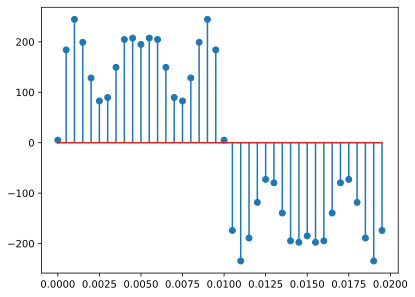

In [131]:
us3 = u_Fs_3[:N]       # Windowing to get one entire period of the fundamental sine wave
ts3 = t_Fs_3[:N]

plt.stem(ts3,us3)
plt.show()

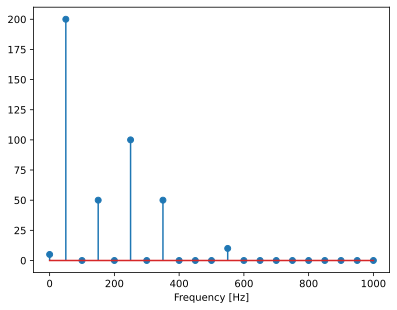

In [132]:
X = np.fft.fft(us3)
Us3 = np.abs(X) / N               # The result is divided by the number of samples N
Us3[1:] = Us3[1:] * 2             # We multiply the amplitude by 2, expect for the DC component
Us3 = Us3[:N//2+1]                # We only keep the upper part of the spectrum
n = np.arange(N//2+1)             # Indexes of the frequency axis
f = df * n                        # Frequencies of the x-axis
 
plt.stem(f, Us3)
plt.xlabel('Frequency [Hz]')
plt.show()

## 4. Process the temporal data (2 kHz) and then apply the FFT in order to present a spectrum with a frequency resolution of 25 Hz.

In [133]:
Fs = 2000
Ts = 1 / Fs
 
df = 25
N = round(Fs / df)
N

80

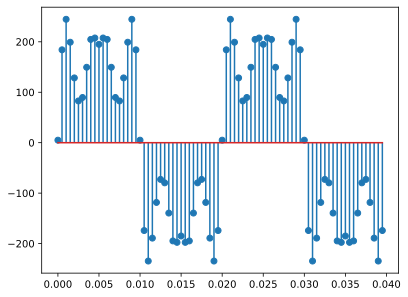

In [134]:
us4 = u_Fs_3[:N]       # Windowing to get the 80 samples, leading to 2 entire periods of the fundamental sine wave
ts4 = t_Fs_3[:N]
 
plt.stem(ts4, us4)
plt.show()

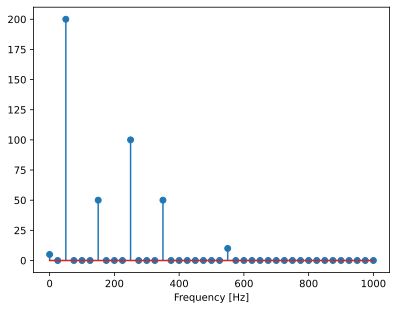

In [135]:
X = np.fft.fft(us4)
Us4 = np.abs(X) / N              # The result is divided by the number of samples N
Us4[1:] = Us4[1:] * 2            # We multiply the amplitude by 2, expect for the DC component
Us4 = Us4[:N//2+1]               # We only keep the upper part of the spectrum 
n = np.arange(N//2+1)            # Indexes of the frequency axis
f = df * n                       # Frequencies of the x-axis
 
plt.stem(f,abs(Us4))
plt.xlabel('Frequency [Hz]')
plt.show()

NB : the time signal had been created this way:

In [136]:
t = np.arange(0, 0.05, 0.0001)
u = 5 + 200*np.sin(2*np.pi*50*t) + 50*np.sin(2*np.pi*3*50*t) + 100*np.sin(2*np.pi*5*50*t) + 50*np.sin(2*np.pi*7*50*t) + 10*np.sin(2*np.pi*11*50*t)